In [154]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder as encoder, StandardScaler as scaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer


link = '../Datasets/HIT400Dataset.csv'

In [155]:
df = pd.read_csv(link)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          21000 non-null  int64 
 1   city                21000 non-null  object
 2   country             21000 non-null  object
 3   amount              21000 non-null  int64 
 4   balance             21000 non-null  int64 
 5   charge_type         21000 non-null  object
 6   asv                 21000 non-null  int64 
 7   cvv                 21000 non-null  int64 
 8   number_of_items     21000 non-null  int64 
 9   order_id            21000 non-null  int64 
 10  cv_data             21000 non-null  int64 
 11  class               21000 non-null  int64 
 12  account_scheme      21000 non-null  object
 13  age_of_account      21000 non-null  int64 
 14  bank_swift_code     21000 non-null  object
 15  date                21000 non-null  object
 16  transaction_status  21

In [157]:
df = df.drop(['country','city','date','bank_swift_code'], axis=1)

In [158]:
data = pd.get_dummies(df[['account_scheme','charge_type']])

In [159]:
Df = df.drop(['account_scheme','charge_type'], axis=1)

In [160]:

Df['account_scheme_Mastercard'] = data['account_scheme_Mastercard'].to_list()
Df['account_scheme_Visa'] = data['account_scheme_Visa'].to_list()
Df['charge_type_Credit'] = data['charge_type_Credit'].to_list()
Df['charge_type_Debit'] = data['charge_type_Debit'].to_list()


In [161]:
Df.isnull().sum()

Unnamed: 0                   0
amount                       0
balance                      0
asv                          0
cvv                          0
number_of_items              0
order_id                     0
cv_data                      0
class                        0
age_of_account               0
transaction_status           0
account_scheme_Mastercard    0
account_scheme_Visa          0
charge_type_Credit           0
charge_type_Debit            0
dtype: int64

In [162]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 21000 non-null  int64
 1   amount                     21000 non-null  int64
 2   balance                    21000 non-null  int64
 3   asv                        21000 non-null  int64
 4   cvv                        21000 non-null  int64
 5   number_of_items            21000 non-null  int64
 6   order_id                   21000 non-null  int64
 7   cv_data                    21000 non-null  int64
 8   class                      21000 non-null  int64
 9   age_of_account             21000 non-null  int64
 10  transaction_status         21000 non-null  int64
 11  account_scheme_Mastercard  21000 non-null  int64
 12  account_scheme_Visa        21000 non-null  int64
 13  charge_type_Credit         21000 non-null  int64
 14  charge_type_Debit     

In [163]:
df = Df.drop('Unnamed: 0',axis=1)
data.isnull().sum()

account_scheme_Credit        0
account_scheme_Debit         0
account_scheme_Mastercard    0
account_scheme_Visa          0
charge_type_Credit           0
charge_type_Debit            0
dtype: int64

In [164]:
from sklearn.preprocessing import StandardScaler

features = [c for c in df.columns.tolist() if c not in ['class']]

x = df.loc[:, features].values

y = df.loc[:, ['class']].values

x = StandardScaler().fit_transform(x)

In [167]:
pca = PCA(n_components=13)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = features)

In [168]:
targetDataframe = df[['class']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

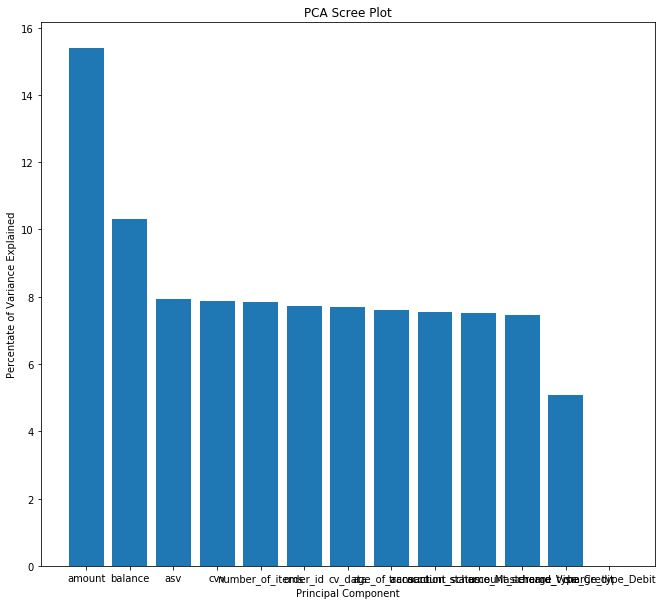

In [170]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = features
plt.bar(x= range(1,14), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

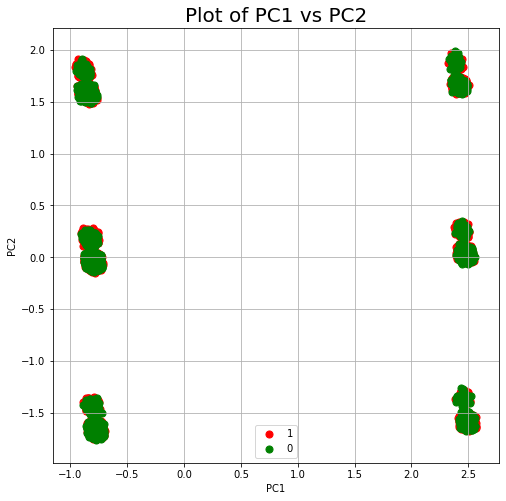

In [173]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = [1, 0]

colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['class'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'amount']
               , newDataframe.loc[indicesToKeep, 'balance']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [176]:
newDataframe.to_csv('../Datasets/new_pca.csv')